# February 2, 2017 class: Precipitation, continued

Let's start off with the usual import. The Seaborn package generally makes your plots look nicer. You probably need to install it first. Open up a terminal window and type `pip install seaborn`, and your computer will do the rest! If you don't have time to do this now, your plot will still work but won't look quite as pretty.

In [3]:
# Import numerical tools
import numpy as np

#Import pandas for reading in and managing data
import pandas as pd

#This imports the statistics of the normal distribution
from scipy.stats import norm

# Import pyplot for plotting
import matplotlib.pyplot as plt

#Import seaborn (useful for plotting)
#import seaborn as sns

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

%config InlineBackend.figure_formats = {'svg',}
#%config InlineBackend.figure_formats = {'png', 'retina'}

We're going to read in [some actual rainfall gauge data](https://drive.google.com/file/d/0BzoZUD3hISA4bE1WbFJocHpSd3c/view?usp=sharing) from Niger. The variable precip6hrly is precipitation data collected every 6 hours for the full years 1990-2012. The variable PrecipDaily is the same dataset, aggregated at the daily time interval.

In [4]:
# Use pd.read_csv() to read in the data and store in a DataFrame
fname = '/Users/lglarsen/Desktop/Laurel Google Drive/Terrestrial hydrology Spr2017/Public/precipAll.csv'
df = pd.read_csv(fname)

In [5]:
df.head()

,precip6hrly,precipDaily
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [6]:
p6 = df['precip6hrly']
print(len(p6)) #Print out the length of this variable.
pday = df['precipDaily']
print(len(pday)) #Print out the length of this variable. It should be 4x shorter than p6, but you'll see it's not!
print(pday[len(pday)-1]) #Let's look at the last index of this array. Why do we index pd with len(pd)-1?

33580
33580
nan


We can see that the pd.read_csv command reads in the maximum number of rows on the spreadsheet. Although the data in the column for daily precipitation do not extend for as many rows as the data in the column for 6-hourly precipitation, the length of both arrays ends up being the same, with the "extra" rows in the daily column being occupied by "nan" (**N**ot **A** **N**umber--coding parlance for blanks here).

So, let's get rid of those blanks. 

In [7]:
pday_no_nan = pday[~np.isnan(pday)]
print(len(pday_no_nan))

8395


Let's break down what we just did. Recall that `np` is how we refer to a command that comes from the `numpy` library (whose commands are actually very similar to Matlab commands, in case you are familiar with those!). `np.isnan` queries each element in an array and assigns a "true" to those elements that are "NaN" and a "false" to elements that are not "NaN." It returns an array that is the same length as the argument in the command. Insert a cell below to print out the length of `np.isnan(pday)`. Do you remember how to look at the first few entries of this array?

Next, the `~` symbol: This inverts the outcome of a logical operation. In other words, it will cause a "true" statemetn to become "false," and vice-versa. 

Last, when you index a variable with a logical array, the "output" will be just those elements of the array (rows) that evaluate as "true."

Putting this all together, we are creating an array, `pday_no_nan`, which is equal to all of the rows of `pday` that are NOT NaNs. In other words, just the actual rows of daily data! We should see that the length is 1/4 that of p6, which is indeed the case! 

It's generally good practice not to overwrite a variable with a variable of the same name unless you are **absolutely sure** that you have coded the formula correctly. In this case, our check has shown us that we have, so we can now feel free to rename `pday_no_nan` as `pday` for convenience.

In [8]:
pday = pday_no_nan

## Manipulating the precipitation data

### Hyetograms

Let's create a hyetogram of one of the storms that is present in the 6-hourly data. (If you'd like to practice on your own, do this for a different storm!) Browsing the input CSV file in the spreadsheet program of your choice, you see that rows 3801-3816 on the spreadsheet (remember that in python this correspondes to *indices* 3799-3814 (you subtract 2 because recall that the first row is the column headings, and Python indexes starting with 0) constitutes a nice storm. Let's make a hyetogram of it!

3799    23.36
3800     0.57
3801     0.07
3802     0.03
3803     0.02
3804     0.09
3805    11.32
3806    14.60
3807     0.05
3808     0.03
3809     0.15
3810     0.02
3811     0.02
3812     6.01
3813     0.07
Name: precip6hrly, dtype: float64


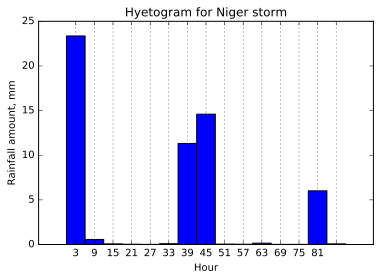

In [9]:
mystorm = p6[3799:3814] #Grab only the data from that storm
print(mystorm) #Always a good idea to check and make sure you got the right thing.
#We will plot this using a bar plot from matplotlib.

#Bar locations
x = np.arange(len(mystorm)) #Generates a sequential range of numbers up to the length of mystorm.

#Let's label each bar with the median of the time increment that it corresponds to.
bar_labels = range(3, len(mystorm)*6-3, 6)#This command generates a sequence of numbers,
#starting at 3, advancing in increments of 6, all the way up to the length of 'mystorm'-3.
#Print it to verify!

#Set the bar widths
bar_width = 1 #This ensures that the bars are depicted side-by-side, without
#any space between them.

#Now let's generate the plot!
plt.bar(x, mystorm, width=bar_width, align='center')
plt.grid(axis='x') #Generates a grid parallel to the x-axis.
plt.xticks(x, bar_labels)
plt.ylabel('Rainfall amount, mm')
plt.xlabel('Hour')
plt.title('Hyetogram for Niger storm')

### Frequency analysis

Now let's look at the distributions of storms within the daily dataset! Let's first look at how they differ from daily, to monthly, to annually by creating histograms.

In [10]:
print(len(pday)/365)

23


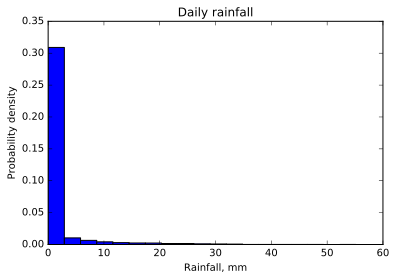

In [11]:
plt.hist(pday, 20, normed=True) #creates a 20-bin, normalized histogram.
plt.title('Daily rainfall')
plt.xlabel('Rainfall, mm')
plt.ylabel('Probability density')

Wow! Those zeros are really dominant! What does this distribution look like if we only look at the days when it is raining?

2777


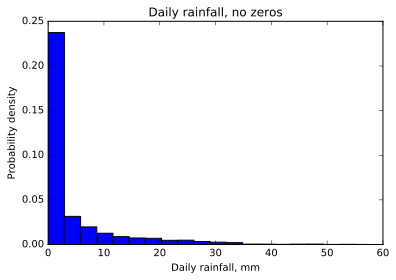

In [12]:
pd_raining = pday[pday>0] #Can you figure out what this means?
print(len(pd_raining)) #This should be shorter than pday!
plt.hist(pd_raining, 20, normed=True)
plt.xlabel('Daily rainfall, mm')
plt.ylabel('Probability density')
plt.title('Daily rainfall, no zeros')

Still looks pretty extreme!

Now let's aggregate this data into annual data. There is much less data (23 years), but it is still an interesting exercise. To do this, we will first "reshape" the daily array into a **matrix** in which the rows represent day of the year and the columns represent years. Thank god somebody has already taken out the "leap days" every 4 years, or this operation would be a lot trickier!

Once we reshape the array into a matrix, we will simply sum all of the rows in each column to get an annual total, which will leave us with an array that has the total rainfall for each year (1 x 23 in size).

In [13]:
p_reshaped = np.reshape(pday, [365, 23])
pAnn = np.sum(p_reshaped,0) #The '0' indicates that we sum over the rows. 
print(len(pAnn))
#What will be the output of this box if instead you sum over the columns (1)?

23


Now let's generate the histogram of the annual data.

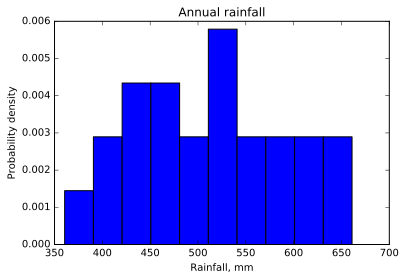

In [14]:
plt.hist(pAnn, normed=True)
plt.xlabel('Rainfall, mm')
plt.ylabel('Probability density')
plt.title('Annual rainfall')

With some squinting, you might convince yourself that this is a normal distribution that we just haven't sampled very well. For the sake of this exercise, let us assume that it is. Based on this assumption and the past record of data, what is the probability that the rainfall in any given year exceeds the maximum value in this dataset?

First, we need to figure out the maximum and compute its z-score. Next we need to figure out the cumulative probability of the normal distribution **below** that value, and subtract it from 1. Here is how we do that in Python:

In [15]:
print(np.max(pAnn)) #Tells us what the maximum value is, in mm.
zmax = (np.max(pAnn)-np.mean(pAnn))/np.std(pAnn) #See! Numpy can calculate the mean and standard deviation of arrays easily.
#zmax is the maximum z-score in the dataset.
print(zmax)
1-norm.cdf(zmax) #This gives us the probability that we will see a year with a greater rainfall than the maximum 
#of this dataset. Note the difference between this and using a 'print' statement.

661.05
1.83783110045


0.033043648649204949

Next, instead of dealing with the annual **total** rainfall, we'll do a frequency analysis with the annual **maximum daily** rainfall.

Very similarly to what we just did above to calculate the annual total rainfall, we will generate an array of annual maximum daily rainfall (i.e., the greatest rainfall amount that fell within a single day each year).

(array([ 0.07108937,  0.0568715 ,  0.04265362,  0.01421787,  0.04265362,
         0.        ,  0.04265362,  0.01421787,  0.02843575,  0.01421787]),
 array([ 27.49 ,  30.548,  33.606,  36.664,  39.722,  42.78 ,  45.838,
         48.896,  51.954,  55.012,  58.07 ]),
 <a list of 10 Patch objects>)

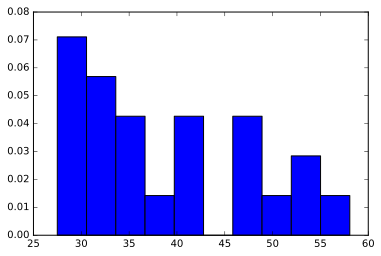

In [16]:
pMD = np.max(p_reshaped,0)

#Now let's look at its distribution!
plt.hist(pMD, normed=True)

Kind of messy! Well, it's real data. Let's see what the Gumbel and Weibull methods give us for the probability of exceeding the maximum daily rain event in this record.

#### Gumbel distribution
First we need to calculate alpha and beta...

[ 0.03622615]


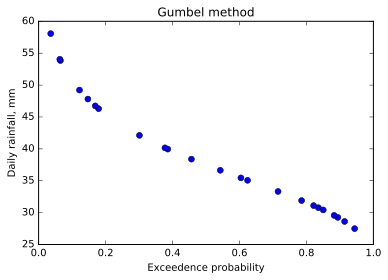

In [17]:
alpha = np.sqrt(6)/np.pi*np.std(pMD) #From the formula
beta = np.mean(pMD)-0.5772*alpha 
G_exceedP = 1-np.exp(-np.exp(-(pMD-beta)/alpha)) #exceedence probability
#This is the probability that you will get a storm that delivers this amount
#of rain or more in any given year.
G_T = 1/G_exceedP #Return interval, in years

#Now let's plot the data as a frequency/magnitude curve.
plt.plot(G_exceedP, pMD, 'o')
plt.xlabel('Exceedence probability')
plt.ylabel('Daily rainfall, mm')
plt.title('Gumbel method')

#To answer the original question, we can also query the exceedence probability of the maximum.
print(G_exceedP[pMD==np.max(pMD)])
#This literally means "print the entry of G_exceedP from the same row as where
#pMD equals its maximum value."

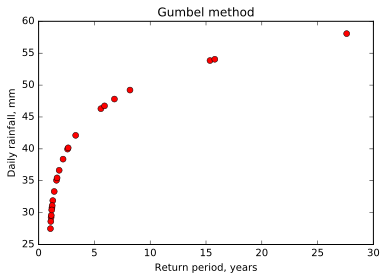

In [18]:
#And again in terms of return period...
plt.plot(G_T, pMD, 'ro') #ooh, 'r' makes the dots red!
plt.xlabel('Return period, years')
plt.ylabel('Daily rainfall, mm')
plt.title('Gumbel method')

So is the max daily rainfall in this record more extreme or less extreme than you would expect to see in a data record that is this long?

#### Weibull distribution
To implement the Weibull method, we first have to sort the data so that we can rank them. Fortunately, there is an easy command for this in `numpy`.

We also use the `np.arange` command, which generates an array of numbers. It is basically the same as the `range` command, but you cannot further manipulate numbers generated through `range` (by, for instance, adding to, multiplying, or dividing the list). If you want, you can create a new cell to play around with `range` and `arange`. With both of these commands, the last number generated is always one less than the number you specify! (You can see this if you play around with the command.) This is a tricky quirk of Python. Be careful with it.

In [19]:
ranked = -np.sort(-pMD) #This sorts in descending order (default is ascending, so we add the negatives)
W_T = (len(ranked)+1)/np.arange(1,len(ranked)+1)
W_exceedP = 1/W_T

0


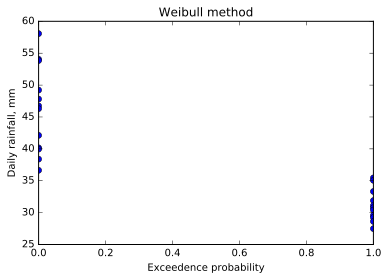

In [20]:
#Now let's plot the data as a frequency/magnitude curve.
plt.plot(W_exceedP, ranked, 'o') #Why do we use 'ranked' instead of pMD?
plt.xlabel('Exceedence probability')
plt.ylabel('Daily rainfall, mm')
plt.title('Weibull method')

#Now let's print the exceedence probability of the maximum. Note the difference
#in how I do this. 
print(W_exceedP[0])

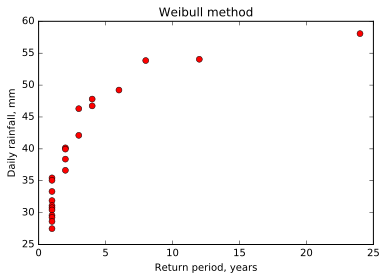

In [21]:
#Now let's plot the data as a frequency/magnitude curve.
plt.plot(W_T, ranked, 'ro')
plt.xlabel('Return period, years')
plt.ylabel('Daily rainfall, mm')
plt.title('Weibull method')

Note that if we plot this on a logarithmic axis, it becomes more linear in appearance (hence easier to fit with a linear regression).

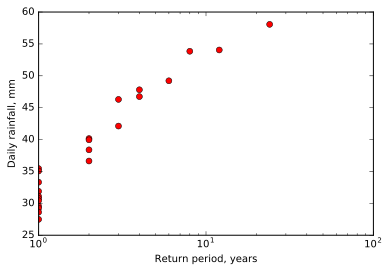

In [22]:
#Now let's plot the data as a frequency/magnitude curve.
plt.semilogx(W_T, ranked, 'ro')
plt.xlabel('Return period, years')
plt.ylabel('Daily rainfall, mm')

How does the maximum return period compare to the Weibull calculations above?

Just to take this one step further, we'll fit a linear regression to the data plotted on the log plot above using the `np.polyfit` command. This fits a polynomial of a specified degree to the x and y data that you supply and returns the coefficients. You can then use `np.polyval` to evaluate the fitted polynomial at each point in a list of x-values. Let's take a look... 

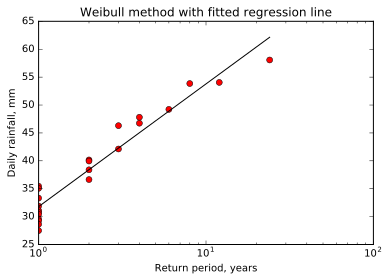

In [23]:
fitted_coeffs = np.polyfit(np.log10(W_T), ranked, 1) #Returns the slope and
#intercept of the linear regression. Note that we had to first take the 
#log-base-10 of the return period (since the relationship is linear in log space)

#Generate a list of years to apply the fitted polynomial to, from the minimum
#return period to the maximum return period (log-transformed, of course)
yrs = np.log10(np.arange(np.min(W_T), np.max(W_T)+1))
yval = np.polyval(fitted_coeffs, yrs) #Solve the linear equation at each return period of interest

#Now let's remake the plot:
#Now let's plot the data as a frequency/magnitude curve.
plt.semilogx(W_T, ranked, 'ro', 10**yrs, yval, 'k-')
#Note that the semilogx command takes the log-base-10 of the x-variable.
#We ALREADY took the log of the return period in computing 'yrs', so 
#to avoid taking the log of it again, we raise it to the power of 10 before
#feeding it to the 'semilogx' function.

plt.xlabel('Return period, years')
plt.ylabel('Daily rainfall, mm')
plt.title('Weibull method with fitted regression line')